In [1]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Installed version_information.py. To use it, type:
  %load_ext version_information


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
IPython 4.0.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
pandas 0.16.2
Mon Sep 14 16:12:30 2015 PDT

In [2]:
!pwd

/Users/berkeleyalmand/repos/ski_in_solitude


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

# Import traffic data

In [4]:
df_traf = pd.DataFrame.from_csv('data/berthoud_skiers.csv')

In [5]:
df_traf.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers
FormattedDate,,,,
2014-10-31,1803,2822,4,0.971232
2014-11-01,1938,2686,5,1.169169
2014-11-02,2679,1379,6,1.314465
2014-11-03,1539,1290,0,1.061945
2014-11-04,1624,1529,1,1.013577


# Import weather data

In [8]:
df_met = pd.DataFrame.from_csv('data/all_weather_clean.csv')

In [9]:
df_met.head()

,Time,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,thunderstorm_snow,clear_sky,broken_sky,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
Date,,,,,,,,,,,,,,,,,,,
2014-11-01,10,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,30,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,50,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,110,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10
2014-11-01,130,0,0,0,0,0,0,1,0,0,0,0,5,-1,37,18.27027,96,88.430556,10


In [10]:
resamp_time = '1440Min'
df_all = pd.concat([df_traf.resample(resamp_time), df_met.resample(resamp_time)], axis=1).dropna()

In [11]:
df_all.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers,Time,freezing_fog,heavy_snow,light_snow,mist,thunderstorm_haze,...,scattered_sky,overcast,snowfall,high_temp_C,low_temp_C,max_windspeed,mean_windspeed,max_rh,mean_rh,mean_visibility
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2014-11-01,1938,2686,5,1.169169,1179.805556,0.000000,0.000000,0.000000,0.000000,0.027778,...,0.138889,0.000000,0.00,5,-1,37,18.270270,96,88.430556,10.000000
2014-11-02,2679,1379,6,1.314465,1211.217391,0.043478,0.014493,0.028986,0.072464,0.028986,...,0.289855,0.115942,0.06,-1,-6,36,15.444444,96,86.623188,8.623188
2014-11-03,1539,1290,0,1.061945,1243.306452,0.370968,0.048387,0.096774,0.080645,0.000000,...,0.080645,0.725806,0.14,-6,-11,33,16.163265,92,85.919355,2.281250
2014-11-04,1624,1529,1,1.013577,1179.819444,0.000000,0.000000,0.000000,0.013889,0.000000,...,0.000000,0.291667,0.45,-5,-13,44,19.014286,96,83.986111,9.425000
2014-11-05,1672,1667,2,0.995124,1179.875000,0.055556,0.000000,0.013889,0.055556,0.000000,...,0.055556,0.208333,0.00,-1,-10,43,19.628571,92,84.708333,9.013889


In [15]:
df_all.drop(['berthoud_toward_i70', 'berthoud_away_i70', 'Time'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b2255d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e8cfb10>]], dtype=object)

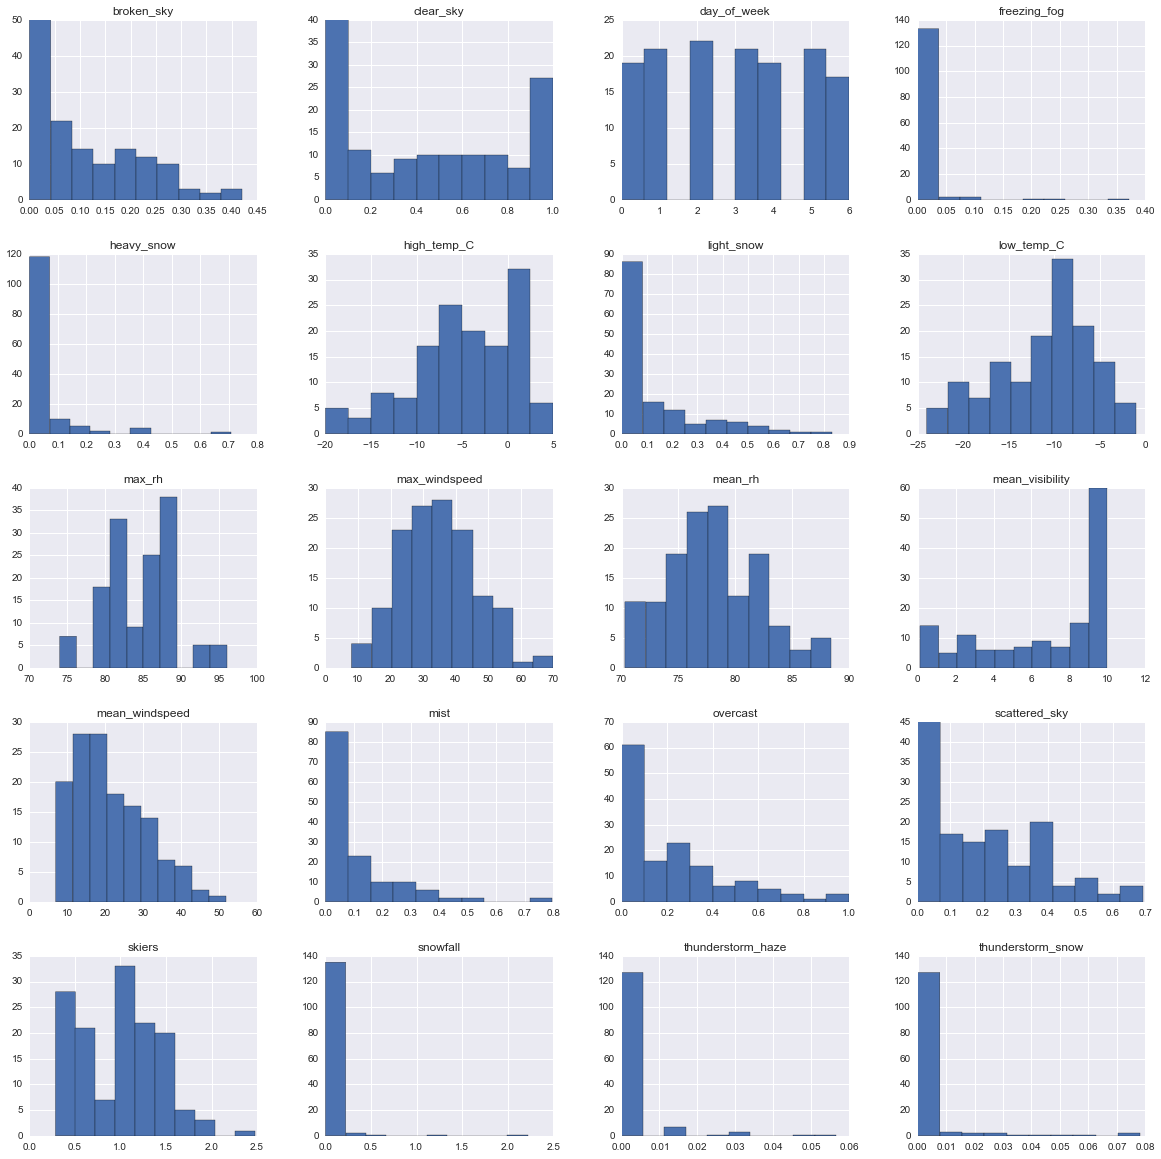

In [18]:
df_all.hist(figsize=(20,20))

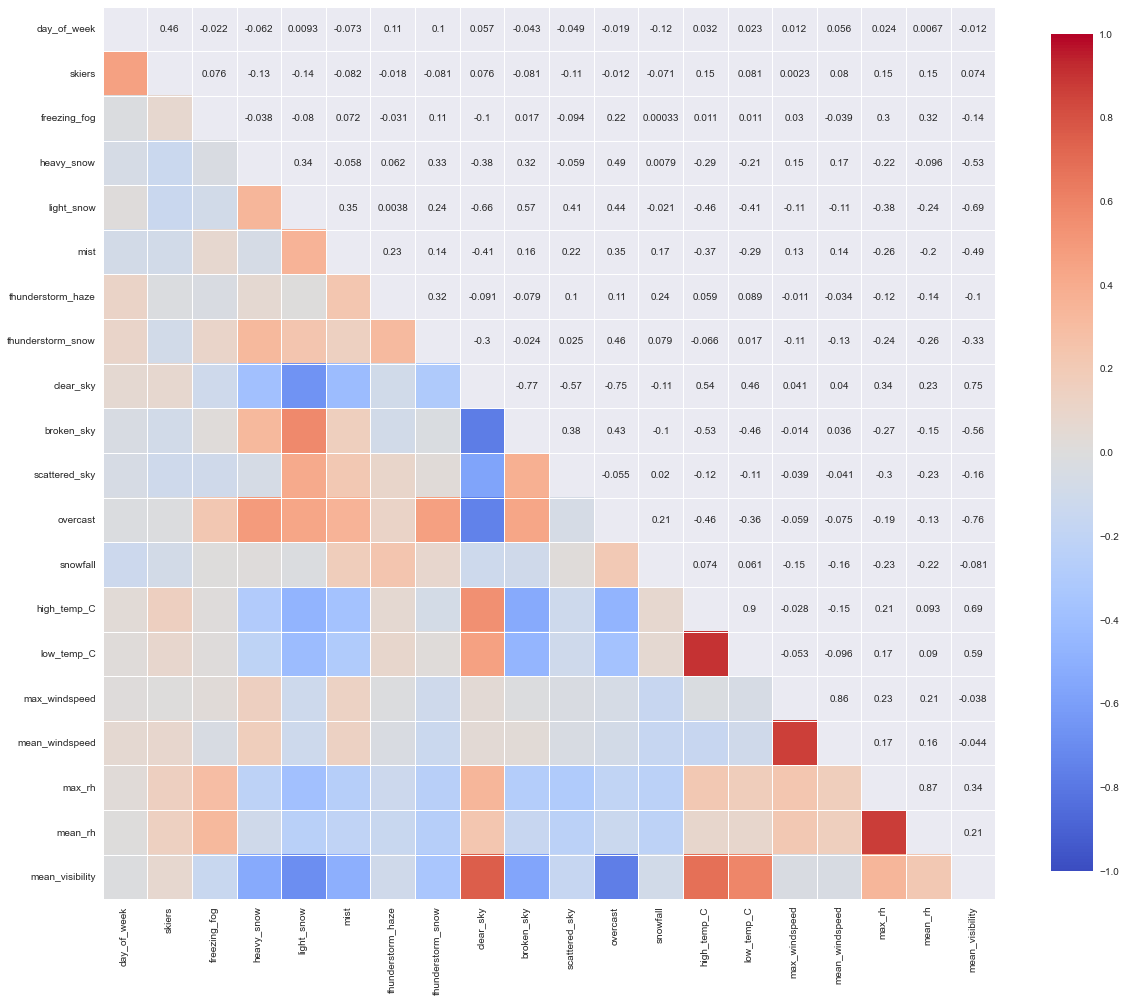

In [19]:
f, ax = plt.subplots(figsize=(20, 20))
sns.corrplot(df_all, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()